#<center><h1>-- Gambaran --</h1></center>

Kompilasi semua kursus terkait pengembangan (13 ribu kursus) yang tersedia di situs web Udemy. Di bawah kategori pengembangan, ada kursus dari Keuangan, Akuntansi, Pembukuan, Kepatuhan, Cryptocurrence, Blockchain, Ekonomi, Investasi & Perdagangan, Pajak dan banyak lagi masing-masing memiliki beberapa kursus di bawah domainnya.
Semua detailnya juga dapat ditemukan di situs web Udemy!

Isi
Di sini, saya telah mengekstrak data yang terkait dengan kursus 10k yang termasuk dalam kategori pengembangan di situs web Udemy.
17 kolom dalam kumpulan data dapat digunakan untuk mendapatkan wawasan terkait dengan:

*  ***id*** : ID mata kuliah dari mata kuliah tersebut.
*  ***title*** : Menampilkan nama unik kursus yang tersedia di bawah kategori pengembangan di Udemy.
*  ***url***: Memberikan URL kursus.
*  ***is_paid*** : Mengembalikan nilai boolean yang menampilkan true jika kursus dibayar dan false jika sebaliknya.
*  ***num_subscribers*** : Menunjukkan jumlah orang yang telah berlangganan kursus itu.
*  ***avg_rating*** : Menampilkan nilai rata-rata kursus.
*  ***avg rating*** recent : Mencerminkan perubahan terbaru dalam peringkat rata-rata.
*  ***num_reviews*** : Memberi kami gambaran terkait jumlah peringkat yang diterima suatu kursus.
*  ***num_published_lectures*** : Menampilkan jumlah kuliah yang ditawarkan kursus.
*  ***num_published_ practice_tests*** : Memberikan gambaran tentang jumlah tes latihan yang ditawarkan kursus.
*  ***dibuat*** : Waktu pembuatan kursus.
*  ***publish_time*** : Waktu penerbitan kursus.
*  ***discounted_ price_amount*** : Harga diskon yang ditawarkan pada kursus tertentu.
*  ***discounted_ price_currency*** : Mata uang yang sesuai dengan harga diskon yang ditawarkan pada kursus tertentu.
*  ***price_ detail_amount*** : Harga asli dari kursus tertentu.
*  ***price_ detail_currency*** : Mata uang yang sesuai dengan jumlah detail harga untuk kursus.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as stopwords_clean
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
import nltk
import string
import re

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# *Loading Data*

In [ ]:
data = pd.read_csv('Dataset1.csv')

In [ ]:
data.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


# EDA

## Informasi umum dataset

In [ ]:
# cek jumlah baris dan kolom
data.shape

(9447, 20)

In [ ]:
# cek nama-nama kolom pada dataset
data.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string'],
      dtype='object')

Dari kolom dataset diatas, bisa kita kategorikan dalam 3 jenis informasi
1. `Informasi course`, meliputi id, title, url, is_paid, num_published_lectures, num_published_practice_tests, created,published_time
2. `Informasi performa course`, meliputi num_subscribers, avg_rating, avg_rating_recent, rating, num_reviews, is_wishlisted
3. `Informasi harga course`, meliputi discount_price__amount, discount_price__currency, discount_price__price_string, price_detail__amount,
price_detail__currency, price_detail__price_string

In [ ]:
# cek jenis tipe dataset
data.dtypes

id                                int64
title                            object
url                              object
is_paid                            bool
num_subscribers                   int64
avg_rating                      float64
avg_rating_recent               float64
rating                          float64
num_reviews                       int64
is_wishlisted                      bool
num_published_lectures            int64
num_published_practice_tests      int64
created                          object
published_time                   object
discount_price__amount          float64
discount_price__currency         object
discount_price__price_string     object
price_detail__amount            float64
price_detail__currency           object
price_detail__price_string       object
dtype: object

In [ ]:
# cek apakah data ID unik
data['id'].unique().size

9447

jumlah baris pada dataset jumlahnya sama dengan jumlah data ID yang unik. artinya dalam dataset tidak ada data yang duplikat atau sama

In [ ]:
# cek informasi dataset
data.describe(include='all')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
count,9.447000e+03,9447,9447,9447,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447,9447.000000,9447.000000,9447,9447,8937.000000,8937,8937,9447.000000,9447,9447
unique,NaN,9424,9447,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,9446,9446,NaN,1,48,NaN,1,36
top,NaN,Become Earned Value Management (EVM) Expert,/course/tableau-introduction-dataset-analysis/,True,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,2015-09-17T20:27:07Z,2019-08-13T23:28:20Z,NaN,INR,₹455,NaN,INR,"₹8,640"
freq,NaN,2,1,9447,NaN,NaN,NaN,NaN,NaN,9447,NaN,NaN,2,2,NaN,8937,8350,NaN,9447,2505
mean,1.456603e+06,NaN,NaN,NaN,3399.298190,4.138522,4.124756,4.124756,299.054515,NaN,34.400868,0.101831,NaN,NaN,488.984111,NaN,NaN,4828.758336,NaN,NaN
std,8.956601e+05,NaN,NaN,NaN,10451.534122,0.453581,0.478410,0.478410,1826.867472,NaN,46.061088,0.580037,NaN,NaN,247.833161,NaN,NaN,3108.307674,NaN,NaN
min,2.762000e+03,NaN,NaN,NaN,3.000000,1.000000,1.000000,1.000000,3.000000,NaN,0.000000,0.000000,NaN,NaN,455.000000,NaN,NaN,1280.000000,NaN,NaN
25%,6.730310e+05,NaN,NaN,NaN,141.000000,3.900000,3.879410,3.879410,12.000000,NaN,13.000000,0.000000,NaN,NaN,455.000000,NaN,NaN,1600.000000,NaN,NaN
50%,1.381806e+06,NaN,NaN,NaN,916.000000,4.200000,4.206080,4.206080,33.000000,NaN,23.000000,0.000000,NaN,NaN,455.000000,NaN,NaN,3840.000000,NaN,NaN
75%,2.154793e+06,NaN,NaN,NaN,2889.500000,4.450000,4.447495,4.447495,110.000000,NaN,39.000000,0.000000,NaN,NaN,455.000000,NaN,NaN,8640.000000,NaN,NaN


Dari hasil descripsi diatas, dapat diperoleh informasi yang diperoleh yaitu:
1. kolom `title`, ternyata ada judul yang ditulis sama karena dari jumlah 9447 dan jumlah data uniknya yaitu 9424. Namun `url` maisng-masing kelas berbeda
2. pada kolom `is_paid`, ada 1 data unik yang berarti memiliki 1 nilai yang sama
3. pada kolom `is_wishlisted`, ada 1 data unik yang berarti memiliki 1 nilai yang sama

Hal yang perlu dipastikan lagi
1. apakah kolom `discount_price__currency` dan kolom `discount_price__currency` unik hanya 1? jika iya tampilkan datanya
2. apakah kolom `avg_rating_recent` memiliki informasi statiska sama dengan kolom `rating`?  
3. apakah Kolom `discount price price string` sama dengan nilai kolom `discount_price__amount`?
4. apakah kolom `price_detail__amount` dan kolom `price_detail__price_string` memiliki nilai yang sama?
5. Apakah mata uang antara kolom `discount_price__currency` sama dengan kolom `price_detail__currency`?


In [ ]:
data.isnull().sum()

id                                0
title                             0
url                               0
is_paid                           0
num_subscribers                   0
avg_rating                        0
avg_rating_recent                 0
rating                            0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
created                           0
published_time                    0
discount_price__amount          510
discount_price__currency        510
discount_price__price_string    510
price_detail__amount              0
price_detail__currency            0
price_detail__price_string        0
dtype: int64

In [ ]:
data.duplicated('title').sum()

23

In [ ]:
data[data.duplicated('title')].head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
1571,2794534,Sales Fundamentals,/course/sales-fundamentals-x/,True,2245,3.70000,3.62002,3.62002,215,False,23,0,2020-02-03T18:08:39Z,2020-02-11T21:21:39Z,700.0,INR,₹700,1280.0,INR,"₹1,280"
2574,1533564,Lean Six Sigma White Belt,/course/lean-six-sigma-white-belt-cert/,True,263,4.35000,4.31770,4.31770,95,False,7,0,2018-01-31T01:09:07Z,2018-02-14T20:35:04Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
2944,1809178,PMP EXAM PREP-Project Management Professional ...,/course/pmp-certification-training-35-hours-ba...,True,353,4.05882,4.06389,4.06389,77,False,270,0,2018-07-20T06:43:21Z,2018-12-21T21:42:23Z,481.0,INR,₹481,8960.0,INR,"₹8,960"
3355,1133386,Fundamentals of Accounting & Bookkeeping,/course/fundamentals-of-accounting-j/,True,1867,4.05000,3.91132,3.91132,61,False,15,0,2017-03-03T07:16:17Z,2017-09-18T14:18:30Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
4266,2466230,Learn Machine Learning From Scratch,/course/complete-machine-learning-course-learn...,True,4863,2.70000,2.63667,2.63667,40,False,5,0,2019-07-18T22:21:39Z,2019-07-20T21:42:20Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


dari hasil diatas ada 23 data duplicated dari kolom title. namun untuk kolom lainnya semua datanya berbeda (jika disamakan antar kolom). pada title yang sama yang membuat row tersebut dikatakan berbeda karena tahun publishnya berbeda. contohnya pada course Sales Fundamentals yang mawalnya pernah dipublish tahun 2015 namun di row lain dipublish tahun 2020. Kami mengasumsikan bahwa course tersebut diperbarui. Namun mengingat data duplikat disini hanya 23, yang bisa dikatakan jumlahnya sedikit, maka kami tidak menganalisisnya lebih lanjut. membiarkan data tersebut seperti data lain, dengan mengganggapkan bahwa judul yang sama namun course kelas yang berbeda. pada url kelas pun judul cuorse yang sama namun url course berbeda. berarti memang ada dua kelas yang berbeda dengan topik/judul yang sama

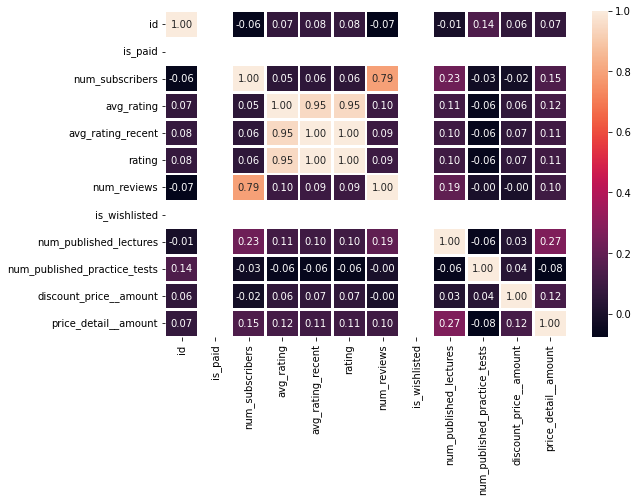

In [ ]:
corr = data.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr,annot = True, linewidths= 1.5, fmt = '.2f', ax=ax)

plt.show()

## *Comparisson* mata uang

In [ ]:
string_price = data[['discount_price__currency','price_detail__currency']]

In [ ]:
comparison_columns = np.where(string_price['discount_price__currency'] == string_price['price_detail__currency'], True, False)
string_price['comparison'] = comparison_columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
string_price.head()

,discount_price__currency,price_detail__currency,comparison
0,INR,INR,True
1,INR,INR,True
2,INR,INR,True
3,INR,INR,True
4,INR,INR,True


In [ ]:
string_price['comparison'].value_counts()

True     8937
False     510
Name: comparison, dtype: int64

In [ ]:
string_price[string_price['comparison'] == False]

,discount_price__currency,price_detail__currency,comparison
33,NaN,INR,False
39,NaN,INR,False
40,NaN,INR,False
80,NaN,INR,False
90,NaN,INR,False
...,...,...,...
9410,NaN,INR,False
9411,NaN,INR,False
9412,NaN,INR,False
9413,NaN,INR,False


In [ ]:
string_price.isnull().sum()

discount_price__currency    510
price_detail__currency        0
comparison                    0
dtype: int64

mata uang antara kolom `discount_price__currency` sama dengan kolom `price_detail__currency` ternyata ada yang tidak sama, yaitu 510 data memiliki mata uang yang berbeda. hal itu dikarenakan ada data yang kosong

## *Comparison* diskon

In [ ]:
discount_price = data[['discount_price__amount','discount_price__price_string']]

In [ ]:
discount_price.head()

,discount_price__amount,discount_price__price_string
0,455.0,₹455
1,455.0,₹455
2,455.0,₹455
3,455.0,₹455
4,455.0,₹455


In [ ]:
discount_price.isnull().sum()

discount_price__amount          510
discount_price__price_string    510
dtype: int64

In [ ]:
discount_price = discount_price.dropna()

In [ ]:
discount_price['discount_price__amount'] = discount_price['discount_price__amount'].apply(np.int64)
discount_price.head()

,discount_price__amount,discount_price__price_string
0,455,₹455
1,455,₹455
2,455,₹455
3,455,₹455
4,455,₹455


In [ ]:
discount_price['discount_price__price_string'] = discount_price['discount_price__price_string'].astype('string')
discount_price.dtypes

discount_price__amount           int64
discount_price__price_string    string
dtype: object

In [ ]:
def select_number(text):
  txt_nonumber = "".join([i for i in text if i in string.digits])
  return txt_nonumber

In [ ]:
discount_price['discount_price__price_string'] = discount_price['discount_price__price_string'].apply(lambda x: select_number(x))
discount_price.head()

,discount_price__amount,discount_price__price_string
0,455,455
1,455,455
2,455,455
3,455,455
4,455,455


In [ ]:
discount_price['discount_price__price_string'] = discount_price['discount_price__price_string'].apply(np.int64)
discount_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8937 entries, 0 to 9446
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   discount_price__amount        8937 non-null   int64
 1   discount_price__price_string  8937 non-null   int64
dtypes: int64(2)
memory usage: 209.5 KB


In [ ]:
comparison_price = np.where(discount_price['discount_price__amount'] == discount_price['discount_price__price_string'], True, False)
discount_price['comparison_price'] = comparison_price

In [ ]:
discount_price['comparison_price'].value_counts()

True    8937
Name: comparison_price, dtype: int64

kolom discount_price__amount dan discount_price__price_string ternyata memiliki nilai yang sama

## *Comparison* harga asli

In [ ]:
price = data[['price_detail__amount', 'price_detail__price_string']]

In [ ]:
price.head()

,price_detail__amount,price_detail__price_string
0,8640.0,"₹8,640"
1,8640.0,"₹8,640"
2,8640.0,"₹8,640"
3,8640.0,"₹8,640"
4,8640.0,"₹8,640"


In [ ]:
price.isnull().sum()

price_detail__amount          0
price_detail__price_string    0
dtype: int64

In [ ]:
discount_price = discount_price.dropna()

In [ ]:
price['price_detail__amount'] = price['price_detail__amount'].apply(np.int64)
price.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price_detail__amount,price_detail__price_string
0,8640,"₹8,640"
1,8640,"₹8,640"
2,8640,"₹8,640"
3,8640,"₹8,640"
4,8640,"₹8,640"


In [ ]:
price['price_detail__price_string'] = price['price_detail__price_string'].astype('string')
price.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


price_detail__amount           int64
price_detail__price_string    string
dtype: object

In [ ]:
def select_number(text):
  txt_nonumber = "".join([i for i in text if i in string.digits])
  return txt_nonumber

In [ ]:
price['price_detail__price_string'] = price['price_detail__price_string'].apply(lambda x: select_number(x))
price.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price_detail__amount,price_detail__price_string
0,8640,8640
1,8640,8640
2,8640,8640
3,8640,8640
4,8640,8640


In [ ]:
price['price_detail__price_string'] = price['price_detail__price_string'].apply(np.int64)
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   price_detail__amount        9447 non-null   int64
 1   price_detail__price_string  9447 non-null   int64
dtypes: int64(2)
memory usage: 147.7 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
comparison_price_real = np.where(price['price_detail__amount'] == price['price_detail__price_string'], True, False)
price['comparison_price_real'] = comparison_price_real

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
price['comparison_price_real'].value_counts()

True    9447
Name: comparison_price_real, dtype: int64

kolom Comparison kolom price_detail__amount dan kolom price_detail__price_string ternyata memiliki nilai yang sama dan ada 510 course yang tidak menerapkan diskon

In [ ]:
non_discount = data[data['discount_price__amount'].isnull()]

In [ ]:
non_discount

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
33,139166,Conscious Listening,/course/conscious-listening/,True,27681,4.47545,4.48064,4.48064,10671,False,14,0,2013-12-29T13:38:01Z,2013-12-31T16:51:18Z,NaN,NaN,NaN,2240.0,INR,"₹2,240"
39,2246852,Emotional Intelligence at Work: Learn from You...,/course/emotional-intelligence-at-work-learn-f...,True,20978,4.45476,4.45477,4.45477,9594,False,21,1,2019-02-28T23:37:10Z,2019-03-18T14:09:54Z,NaN,NaN,NaN,3200.0,INR,"₹3,200"
40,139200,Powerful speaking,/course/powerful-speaking/,True,34296,4.43750,4.45212,4.45212,9520,False,19,0,2013-12-29T15:38:47Z,2013-12-31T16:52:41Z,NaN,NaN,NaN,2240.0,INR,"₹2,240"
80,43319,Options Trading Basics (3-Course Bundle),/course/learn-options-trading-courses/,True,28932,4.42527,4.41998,4.41998,4881,False,47,0,2013-02-24T14:47:08Z,2013-02-25T11:36:06Z,NaN,NaN,NaN,9600.0,INR,"₹9,600"
90,328266,Project Management Professional (PMP)® - 35 Co...,/course/pmp-certification-complete/,True,27653,4.40769,4.41472,4.41472,4579,False,345,0,2014-10-27T16:27:34Z,2014-11-05T21:07:38Z,NaN,NaN,NaN,12800.0,INR,"₹12,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,333014,Leadership Challenges,/course/leadership-challenges/,True,6,3.50000,3.27103,3.27103,3,False,15,0,2014-10-31T21:19:02Z,2014-11-22T01:54:02Z,NaN,NaN,NaN,1280.0,INR,"₹1,280"
9411,283448,Building Your Nonprofit Board - The Smart Way,/course/build-nonprofit-board/,True,55,4.33333,4.29669,4.29669,3,False,13,0,2014-08-19T02:36:57Z,2014-08-31T22:02:20Z,NaN,NaN,NaN,12480.0,INR,"₹12,480"
9412,229360,Level 1 2014 CFA® Program – Corporate Finance,/course/level-1-2014-cfa-program-corporate-fin...,True,223,4.33333,4.29610,4.29610,3,False,18,0,2014-05-26T05:44:55Z,2014-06-21T05:43:33Z,NaN,NaN,NaN,2560.0,INR,"₹2,560"
9413,767350,7) CSMF: Certified Strategic Modeling Facilitator,/course/csmf-certified-strategic-modeling-faci...,True,9,4.66667,4.76602,4.76602,3,False,22,0,2016-02-19T07:14:40Z,2016-03-11T18:20:15Z,NaN,NaN,NaN,7040.0,INR,"₹7,040"


## *Unique value*

In [ ]:
data['is_paid'].value_counts()

True    9447
Name: is_paid, dtype: int64

ternyata dari hasil ilustrasi diatas, is_paid memiliki nilai True semuanya, sehingga bisa diartikan bahwa seluruh course telah dibayar oleh pengguna

In [ ]:
data['is_wishlisted'].value_counts()

False    9447
Name: is_wishlisted, dtype: int64

ternyata dari hasil ilustrasi diatas, kolom is_wishlisted memiliki nilai False semuanya, sehingga bisa diartikan bahwa semua course bukan termasuk dari pilihan daftar keinginan pengguna

In [ ]:
data['discount_price__currency'].value_counts()

INR    8937
Name: discount_price__currency, dtype: int64

In [ ]:
data['discount_price__currency'].unique()

array(['INR', nan], dtype=object)

ternyata dari hasil ilustrasi diatas, kolom discount_price_currency memiliki nilai mata uang yang sama. namun ada data kosong disana

In [ ]:
data['price_detail__currency'].value_counts()

INR    9447
Name: price_detail__currency, dtype: int64

ternyata dari hasil ilustrasi diatas, kolom price_detail_currency memiliki nilai mata uang yang sama. tidak terdapat data kosong, mengingat jumlah nilai INR sama dengan jumlah baris dataset

## *Comparison rating*

In [ ]:
rating = data[['avg_rating_recent', 'rating']]

In [ ]:
comparison_rate = np.where(rating['avg_rating_recent'] == rating['rating'], True, False)
rating['comparison_rate'] = comparison_rate
rating.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,avg_rating_recent,rating,comparison_rate
0,4.67874,4.67874,True
1,4.60015,4.60015,True
2,4.59326,4.59326,True
3,4.53772,4.53772,True
4,4.47173,4.47173,True


In [ ]:
rating['comparison_rate'].unique()

array([ True])

memastikan kembali, apakah rating saat ini dengan kolom rating memiliki nilai yang saa, karena sebelumnya dari informasi statiska, kedua kolom memiliki perhitungan statiska yang serupa. dan ternyata setelah di comparison, ternyata keduanya memiliki nilai yang sama

## Jumlah *views*

jumlah ulasan tidaklah boleh melebihi jumlah pelanggan. hal ini harus dipastikan terlebih dahulu

In [ ]:
review = (data['num_reviews'] > data['num_subscribers'])
review.sum()

0

ternyata tidak, jadi data tersebut sesuai karena jumlah review tidak melebihi jumlah berlangganan

## *Published_time*

In [ ]:
time = data[['created','published_time']]

In [ ]:
time.head()

,created,published_time
0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z
1,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z
2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z
3,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z
4,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z


In [ ]:
time[['created','published_time']] = time[['created','published_time']].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created         9447 non-null   datetime64[ns, UTC]
 1   published_time  9447 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 147.7 KB


In [ ]:
time['publish_year'] = pd.DatetimeIndex(time['published_time']).year
time['create_year'] = pd.DatetimeIndex(time['created']).year
time.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,created,published_time,publish_year,create_year
0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,2016,2016
1,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,2016,2016
2,2017-09-26 16:32:48+00:00,2017-11-14 23:58:14+00:00,2017,2017
3,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,2016,2015
4,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,2016,2015


In [ ]:
comparison_year = np.where(time['publish_year'] == time['create_year'], True, False)
time['comparison_year'] = comparison_year
time['comparison_year'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


True     8305
False    1142
Name: comparison_year, dtype: int64

In [ ]:
time[time['comparison_year'] == False]

,created,published_time,publish_year,create_year,comparison_year
3,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,2016,2015,False
4,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,2016,2015,False
8,2015-11-18 19:35:12+00:00,2016-03-17 17:04:59+00:00,2016,2015,False
16,2016-10-27 21:39:22+00:00,2017-02-23 18:42:20+00:00,2017,2016,False
20,2016-12-08 13:48:36+00:00,2017-03-30 22:17:09+00:00,2017,2016,False
...,...,...,...,...,...
9398,2019-11-28 09:31:45+00:00,2020-07-13 13:24:16+00:00,2020,2019,False
9403,2018-10-29 09:42:39+00:00,2019-04-17 14:36:06+00:00,2019,2018,False
9408,2014-08-31 21:16:41+00:00,2020-01-24 03:08:12+00:00,2020,2014,False
9425,2017-11-14 19:30:25+00:00,2018-05-10 21:15:06+00:00,2018,2017,False


In [ ]:
time['gap_days'] = (time['published_time'] - time['created']).dt.days
time.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,created,published_time,publish_year,create_year,comparison_year,gap_days
0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,2016,2016,True,51
1,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,2016,2016,True,1
2,2017-09-26 16:32:48+00:00,2017-11-14 23:58:14+00:00,2017,2017,True,49
3,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,2016,2015,False,89
4,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,2016,2015,False,91


In [ ]:
time['gap_days'].describe()

count    9447.000000
mean       53.526305
std       130.702036
min        -1.000000
25%         4.000000
50%        14.000000
75%        44.000000
max      1971.000000
Name: gap_days, dtype: float64

In [ ]:
sorted(time['publish_year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [ ]:
sorted(time['create_year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [ ]:
pd.DatetimeIndex(time['published_time']).month

Int64Index([ 4,  8, 11,  1,  1,  5,  6, 11,  3,  4,
            ...
            10, 11, 10,  7,  8, 10, 12, 10,  1,  2],
           dtype='int64', name='published_time', length=9447)

# Pre-Processing

## Time (count) x Subscribe

In [ ]:
time_subs = data

In [ ]:
time_subs[['created','published_time']] = time_subs[['created','published_time']].apply(pd.to_datetime)
time_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            9447 non-null   int64              
 1   title                         9447 non-null   object             
 2   url                           9447 non-null   object             
 3   is_paid                       9447 non-null   bool               
 4   num_subscribers               9447 non-null   int64              
 5   avg_rating                    9447 non-null   float64            
 6   avg_rating_recent             9447 non-null   float64            
 7   rating                        9447 non-null   float64            
 8   num_reviews                   9447 non-null   int64              
 9   is_wishlisted                 9447 non-null   bool               
 10  num_published_lectures        9447 n

In [ ]:
time_subs['publish_year'] = pd.DatetimeIndex(time['published_time']).year
time_subs['create_year'] = pd.DatetimeIndex(time['created']).year
time_subs.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,publish_year,create_year
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26 16:32:48+00:00,2017-11-14 23:58:14+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",2017,2017
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2015
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2015


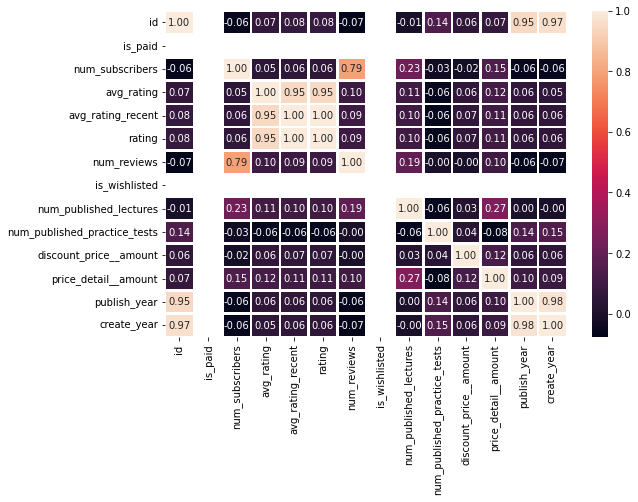

In [ ]:
corr = time_subs.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr,annot = True, linewidths= 1.5, fmt = '.2f', ax=ax)

plt.show()

In [ ]:
count_year = time_subs.groupby('publish_year').publish_year.count()
print(count_year)

publish_year
2010       1
2011       9
2012      64
2013     310
2014     616
2015    1276
2016    1077
2017    1489
2018    1906
2019    1564
2020    1135
Name: publish_year, dtype: int64


In [ ]:
num_year = pd.DataFrame({'Count': time_subs.groupby('publish_year').size()}).reset_index()

In [ ]:
num_year

,publish_year,Count
0,2010,1
1,2011,9
2,2012,64
3,2013,310
4,2014,616
5,2015,1276
6,2016,1077
7,2017,1489
8,2018,1906
9,2019,1564


In [ ]:
num_year['num_subscribe'] = time_subs.groupby('publish_year').count().num_subscribers.reset_index(level=0, drop=True) 

In [ ]:
num_year['num_subscribe'] = time_subs.groupby('publish_year')['num_subscribers'].sum().reset_index(level=0, drop=True)

In [ ]:
num_year

,publish_year,Count,num_subscribe
0,2010,1,2268
1,2011,9,25558
2,2012,64,112534
3,2013,310,1126285
4,2014,616,2541546
5,2015,1276,4784946
6,2016,1077,5908404
7,2017,1489,5827968
8,2018,1906,5205199
9,2019,1564,3405410


In [ ]:
num_year.to_csv('publish.csv')

In [ ]:
num_year_create = pd.DataFrame({'Count': time_subs.groupby('create_year').size()}).reset_index()
num_year_create['num_subscribe'] = time_subs.groupby('create_year').count().num_subscribers.reset_index(level=0, drop=True)

In [ ]:
num_year_create.to_csv('create.csv')

## Time X Price

### Real Price

In [ ]:
time_price = time_subs

In [ ]:
time_price = pd.DataFrame({'num_subscribers': time_price.groupby('publish_year')['num_subscribers'].sum()}).reset_index()

In [ ]:
time_price.head()

,publish_year,num_subscribers
0,2010,2268
1,2011,25558
2,2012,112534
3,2013,1126285
4,2014,2541546


In [ ]:
time_price['avg_price'] = time_subs.groupby('publish_year')['price_detail__amount'].mean().reset_index(level=0, drop=True)

In [ ]:
time_price

,publish_year,num_subscribers,avg_price
0,2010,2268,2560.000000
1,2011,25558,3520.000000
2,2012,112534,3190.000000
3,2013,1126285,3789.419355
4,2014,2541546,4015.064935
5,2015,4784946,4470.219436
6,2016,5908404,4824.363974
7,2017,5827968,5088.623237
8,2018,5205199,5191.521511
9,2019,3405410,5118.567775


In [ ]:
time_price.to_csv('price.csv')

### Discount

In [ ]:
discount = time_subs

In [ ]:
discount.isnull().sum()

id                                0
title                             0
url                               0
is_paid                           0
num_subscribers                   0
avg_rating                        0
avg_rating_recent                 0
rating                            0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
created                           0
published_time                    0
discount_price__amount          510
discount_price__currency        510
discount_price__price_string    510
price_detail__amount              0
price_detail__currency            0
price_detail__price_string        0
publish_year                      0
create_year                       0
dtype: int64

In [ ]:
discount = discount.dropna()

In [ ]:
time_discount = pd.DataFrame({'num_subscribers': discount.groupby('publish_year')['num_subscribers'].sum()}).reset_index()

In [ ]:
time_discount['avg_discount'] = discount.groupby('publish_year')['discount_price__amount'].mean().reset_index(level=0, drop=True)

In [ ]:
time_discount['avg_price'] = time_price['avg_price']

In [ ]:
time_discount.to_csv('discount.csv')

In [ ]:
time_discount

,publish_year,num_subscribers,avg_discount,avg_price
0,2010,2268,468.000000,2560.000000
1,2011,25558,460.000000,3520.000000
2,2012,109600,468.333333,3190.000000
3,2013,966487,464.469231,3789.419355
4,2014,2470145,464.811151,4015.064935
5,2015,4598933,472.939065,4470.219436
6,2016,5825538,476.072394,4824.363974
7,2017,5737281,486.602393,5088.623237
8,2018,5123974,490.966685,5191.521511
9,2019,3282814,502.097709,5118.567775


## Price x Lecture


In [ ]:
price_course = data

In [ ]:
price_course.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,publish_year,create_year
count,9.447000e+03,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,8937.000000,9447.000000,9447.000000,9447.000000
mean,1.456603e+06,3399.298190,4.138522,4.124756,4.124756,299.054515,34.400868,0.101831,488.984111,4828.758336,2017.141950,2016.997460
std,8.956601e+05,10451.534122,0.453581,0.478410,0.478410,1826.867472,46.061088,0.580037,247.833161,3108.307674,1.974982,1.992946
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,455.000000,1280.000000,2010.000000,2010.000000
25%,6.730310e+05,141.000000,3.900000,3.879410,3.879410,12.000000,13.000000,0.000000,455.000000,1600.000000,2016.000000,2015.000000
50%,1.381806e+06,916.000000,4.200000,4.206080,4.206080,33.000000,23.000000,0.000000,455.000000,3840.000000,2017.000000,2017.000000
75%,2.154793e+06,2889.500000,4.450000,4.447495,4.447495,110.000000,39.000000,0.000000,455.000000,8640.000000,2019.000000,2019.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000,2020.000000,2020.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


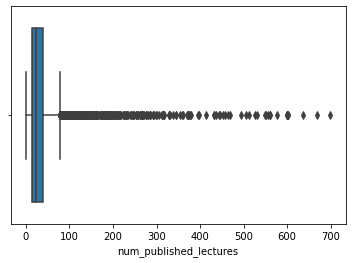

In [ ]:
sns.boxplot(price_course['num_published_lectures'])

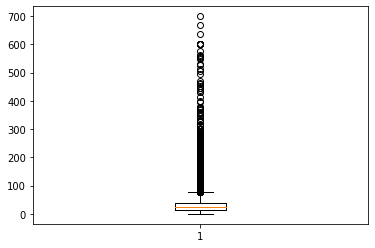

In [ ]:
bp = plt.boxplot(price_course['num_published_lectures'])

In [ ]:
[item.get_ydata() for item in bp['fliers']]

[array([ 84, 292, 338,  83, 275, 275, 144, 413, 117, 286, 225, 101, 160,
        103, 111,  88,  88, 124, 206, 284,  86, 600,  97, 152, 186, 305,
         87,  88, 222,  81, 637, 208, 127,  88, 122,  96,  81,  90,  99,
        345,  83, 125,  88,  91, 257, 301,  85,  81, 398,  87, 114, 122,
        369, 165, 120, 247, 135,  85, 122, 213, 244,  91, 600, 252, 123,
        125,  93,  79, 125,  87, 126, 142, 493, 601,  91, 155,  83,  79,
        154,  86,  91, 217, 202,  79, 253, 105, 208, 299, 141, 109, 267,
        102, 137, 102,  92,  80, 561, 136, 328, 505,  98, 124,  91, 431,
        190, 104, 149, 229,  80,  97, 225, 107,  92, 103, 699,  97, 184,
        560,  80,  98,  86,  93, 109,  89, 119, 111,  99,  92, 668,  81,
        601,  91, 280, 125,  95,  97,  89, 112,  81, 126, 129, 133, 373,
        129, 143, 232,  84, 124, 160,  93, 109,  83, 157, 600, 135, 358,
        119,  83, 136, 291, 131,  88, 132, 142,  80, 174,  93, 103, 187,
        100, 600, 228,  81, 108, 469,  88,  98,  83

In [ ]:
price_course_2 = price_course.drop(price_course[price_course.num_published_lectures > 83].index)

In [ ]:
price_course_2.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,publish_year,create_year
count,8.848000e+03,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8375.000000,8848.000000,8848.000000,8848.000000
mean,1.451814e+06,2912.828323,4.130121,4.116177,4.116177,222.720502,25.751582,0.101492,487.252657,4662.965642,2017.128391,2016.985420
std,8.968955e+05,8333.087880,0.457375,0.483270,0.483270,1183.281684,17.261039,0.589925,237.841346,3061.002786,1.978868,1.996525
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,455.000000,1280.000000,2010.000000,2010.000000
25%,6.680790e+05,130.000000,3.900000,3.867320,3.867320,11.000000,13.000000,0.000000,455.000000,1600.000000,2016.000000,2015.000000
50%,1.361751e+06,832.500000,4.200000,4.198310,4.198310,30.000000,22.000000,0.000000,455.000000,3200.000000,2017.000000,2017.000000
75%,2.149126e+06,2650.000000,4.447370,4.439950,4.439950,96.000000,35.000000,0.000000,455.000000,8640.000000,2019.000000,2019.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,54581.000000,83.000000,6.000000,3200.000000,12800.000000,2020.000000,2020.000000


In [ ]:
print(sorted(price_course_2['num_published_lectures'].unique()))

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]


In [ ]:
intervals = pd.interval_range(start = 0, end = 90, freq = 22)
intervals

IntervalIndex([(0, 22], (22, 44], (44, 66], (66, 88]],
              closed='right',
              dtype='interval[int64]')

In [ ]:
price_course_2['lectures_bin'] = pd.cut(x=price_course_2['num_published_lectures'], bins=[0,22,44,66,88])

In [ ]:
price_course_2.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,publish_year,create_year,lectures_bin
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016,"(66, 88]"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2015,"(66, 88]"
6,864146,Agile Crash Course: Agile Project Management; ...,/course/agile-crash-course/,True,96207,4.32383,4.29118,4.29118,30470,False,23,0,2016-05-30 22:57:40+00:00,2016-06-23 17:49:26+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016,"(22, 44]"
11,751792,Business Analysis Fundamentals,/course/business-analysis-ba/,True,82015,4.49968,4.49034,4.49034,23326,False,67,0,2016-02-03 23:00:19+00:00,2016-02-21 21:40:32+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016,"(66, 88]"
12,613808,Leadership: Practical Leadership Skills,/course/practical-leadership/,True,68148,4.56870,4.59302,4.59302,22595,False,43,0,2015-09-16 15:18:48+00:00,2015-10-09 20:54:44+00:00,455.0,INR,₹455,5760.0,INR,"₹5,760",2015,2015,"(22, 44]"


In [ ]:
num_lectures = pd.DataFrame({'frequency': price_course_2.groupby('lectures_bin').size()}).reset_index()

In [ ]:
num_lectures

,lectures_bin,frequency
0,"(0, 22]",4453
1,"(22, 44]",2900
2,"(44, 66]",1001
3,"(66, 88]",310


In [ ]:
price_course_2 = price_course_2.loc[:,['title', 'lectures_bin', 'price_detail__amount']]

In [ ]:
price_course_2

,title,lectures_bin,price_detail__amount
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,"(66, 88]",8640.0
4,An Entire MBA in 1 Course:Award Winning Busine...,"(66, 88]",8640.0
6,Agile Crash Course: Agile Project Management; ...,"(22, 44]",8640.0
11,Business Analysis Fundamentals,"(66, 88]",8640.0
12,Leadership: Practical Leadership Skills,"(22, 44]",5760.0
...,...,...,...
9442,Simple Value Investing Guide With Proven Methods,"(22, 44]",8640.0
9443,Effectively Optimizing Your Recruitment Process,"(22, 44]",1280.0
9444,Leadership Development:Ready To Use Tools to l...,"(0, 22]",6400.0
9445,Business Efficiency: How To Increase Workplace...,"(0, 22]",6400.0


In [ ]:
price_course_2.to_csv('price_course2.csv')

## Price X Rating

### Bins

In [ ]:
price_rating = data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


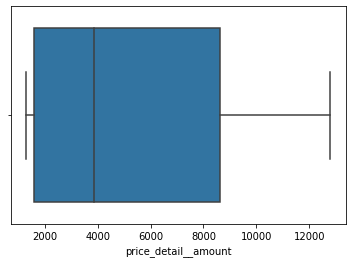

In [ ]:
sns.boxplot(price_rating['price_detail__amount'])

In [ ]:
price_rating.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,publish_year,create_year
count,9.447000e+03,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,8937.000000,9447.000000,9447.000000,9447.000000
mean,1.456603e+06,3399.298190,4.138522,4.124756,4.124756,299.054515,34.400868,0.101831,488.984111,4828.758336,2017.141950,2016.997460
std,8.956601e+05,10451.534122,0.453581,0.478410,0.478410,1826.867472,46.061088,0.580037,247.833161,3108.307674,1.974982,1.992946
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,455.000000,1280.000000,2010.000000,2010.000000
25%,6.730310e+05,141.000000,3.900000,3.879410,3.879410,12.000000,13.000000,0.000000,455.000000,1600.000000,2016.000000,2015.000000
50%,1.381806e+06,916.000000,4.200000,4.206080,4.206080,33.000000,23.000000,0.000000,455.000000,3840.000000,2017.000000,2017.000000
75%,2.154793e+06,2889.500000,4.450000,4.447495,4.447495,110.000000,39.000000,0.000000,455.000000,8640.000000,2019.000000,2019.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000,2020.000000,2020.000000


In [ ]:
interval = pd.interval_range(start = 1250, end = 13000, freq = 2937)
interval

IntervalIndex([(1250, 4187], (4187, 7124], (7124, 10061], (10061, 12998]],
              closed='right',
              dtype='interval[int64]')

In [ ]:
price_rating['price_bin'] = pd.cut(x=price_rating['price_detail__amount'], bins=[1250,4187,7124,10061,12998])

### Average

In [ ]:
num_price = pd.DataFrame({'Count': price_rating.groupby('price_bin').size()}).reset_index()

In [ ]:
num_price

,price_bin,Count
0,"(1250, 4187]",4822
1,"(4187, 7124]",1629
2,"(7124, 10061]",2892
3,"(10061, 12998]",104


In [ ]:
num_price['avg_rating'] = price_rating.groupby('price_bin')['rating'].mean().reset_index(level=0, drop=True)

In [ ]:
num_price

,price_bin,Count,avg_rating
0,"(1250, 4187]",4822,4.079144
1,"(4187, 7124]",1629,4.164263
2,"(7124, 10061]",2892,4.174947
3,"(10061, 12998]",104,4.225098


In [ ]:
num_price.to_csv('num_price.csv')

## Rating x Subscribe

In [ ]:
subs_rate = num_price

In [ ]:
subs_rate['num_subs'] = price_rating.groupby('price_bin')['num_subscribers'].sum().reset_index(level=0, drop=True)

In [ ]:
subs_rate

,price_bin,Count,avg_rating,num_subs
0,"(1250, 4187]",4822,4.079144,10015117
1,"(4187, 7124]",1629,4.164263,4892822
2,"(7124, 10061]",2892,4.174947,16686241
3,"(10061, 12998]",104,4.225098,518990


In [ ]:
subs_rate.to_csv('subs_rate.csv')

## Category x Subscribers

In [ ]:
count_category = pd.DataFrame({'Count': newData.groupby('category').size()}).reset_index()

In [ ]:
count_category

,category,Count,num_subscribe
0,IT,6,15795
1,business,5527,20336740
2,design,4,9883
3,development,9,63241
4,financial,1298,4487967
5,office,1,93
6,self development,21,49600


In [ ]:
count_category['num_subscribe'] = newData.groupby('category')['num_subscribers'].sum().reset_index(level=0, drop=True)

In [ ]:
count_category.to_csv('count_category.csv')

# Analisis dan Visualisasi

## Subs pada year

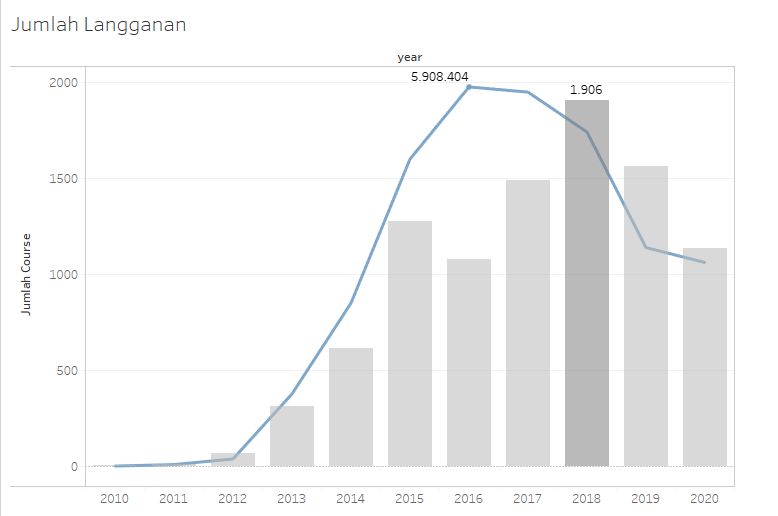

In [ ]:
top_course = time_subs[time_subs['publish_year'] == 2016].sort_values(by='num_subscribers', ascending=False)

In [ ]:
top_course[['title', 'num_subscribers']].head(10)

,title,num_subscribers
4,An Entire MBA in 1 Course:Award Winning Busine...,374836
0,The Complete SQL Bootcamp 2020: Go from Zero t...,295509
3,The Complete Financial Analyst Course 2020,245860
19,Deep Learning Prerequisites: The Numpy Stack i...,239309
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,209070
22,"Introduction to Finance, Accounting, Modeling ...",140676
8,Become a Product Manager | Learn the Skills & ...,112572
6,Agile Crash Course: Agile Project Management; ...,96207
607,Business Bootcamp: 7 Weeks to Start Your Own B...,89171
17,The Complete Investment Banking Course 2020,88468


**berikut kelas lengkapnya**
1. *An Entire MBA in 1 Course:Award Winning Business School Prof*
2. *The Complete SQL Bootcamp 2020: Go from Zero to Hero*
3. *The Complete Financial Analyst Course 2020*
4. *Deep Learning Prerequisites: The Numpy Stack in Python (V2+)*
5. *Tableau 2020 A-Z: Hands-On Tableau Training for Data Science*
6. *Introduction to Finance, Accounting, Modeling and Valuation*
7. *Become a Product Manager | Learn the Skills & Get the Job*
8. *Agile Crash Course: Agile Project Management*
9. *Business Bootcamp: 7 Weeks to Start Your Own Business*
10. *The Complete Investment Banking Course 2020*

In [ ]:
top_course_2020 = time_subs[time_subs['publish_year'] == 2020].sort_values(by='num_subscribers', ascending=False)

In [ ]:
top_course_2020[['title', 'num_subscribers']].head(10)

,title,num_subscribers
1047,Artificial Intelligence Expert Certification,58882
913,Freelance Writing Course: 15 Courses in 1,58014
600,Microsoft Power BI: Latest 2020 Beginner to Ex...,54597
907,Entrepreneurship - Ft. Matthew Rolnick of Yaym...,53614
1284,Next-Level LinkedIn Marketing: LinkedIn Market...,45166
982,Tableau Training: Master Tableau For Data Science,44864
1575,Shopify guide: The complete shopify store crea...,38246
1329,Introduction to Forex- learn to trade forex by...,37024
1928,"Grant Writing Full Course: Nonprofits, Artists...",33109
2333,Shopify Guide: Start your own clothing brand w...,32964


In [ ]:
top_course_2017 = time_subs[time_subs['publish_year'] == 2017].sort_values(by='num_subscribers', ascending=False)
top_course_2017[['title', 'num_subscribers']].head(10)

,title,num_subscribers
15,The Complete Financial Analyst Training & Inve...,182002
35,The Complete Presentation and Public Speaking/...,158654
2,PMP Exam Prep Seminar - PMBOK Guide 6,155282
5,Microsoft Power BI - A Complete Introduction [...,124180
16,The Ultimate Hands-On Hadoop - Tame your Big D...,114945
77,"The Complete Personal Finance Course: Save,Pro...",87181
20,Python for Finance: Investment Fundamentals & ...,83072
14,SQL - MySQL for Data Analytics and Business In...,78968
13,The Complete Foundation Stock Trading Course,76812
25,The Complete Shopify Aliexpress Dropship course,74011


## Subs pada price

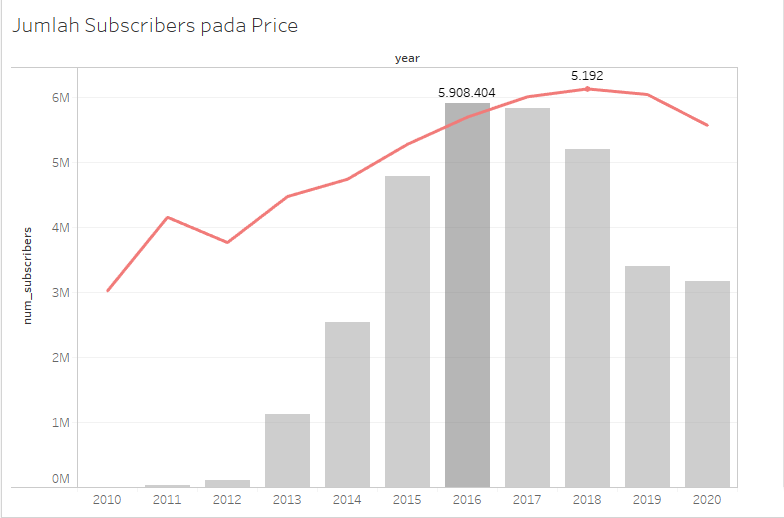

dari visualisasi diatas, ternyata pada tahun 2018 harga rerata course terhitung tinggi yaitu `$5,192`. Namun yang berlangganan hanyalah 5jt sekian yang terhitung sedikit jika dibandikan pada tahun 2018 dengan pelanggan hampir 7juta. Pada tahun 2016, harga rerata course `$4.8`. Jika dibandingkan keduanya, selisih yang dihasilkan dari harga dan jumlah berlangganan sedikit atau kurang lebih hampir sama. 

Tetapi pada tahun 2017 dengan jumlah pelanggan yang kurang lebih sama dengan tahun 2016, dan rerata harga course juga terhitung sedikit lebih tinggi yang hampir sama dengan tahun 2018. Sehingga dapat ditarik kesimpulan, bahwa harga dalam sebuah course tidak selalu mempengaruhi jumlah pelanggan. Pelanggan memilih berlangganan sebuah course karena mereka memang minat dan butuh, bukan perihal faktor harga murah saja.

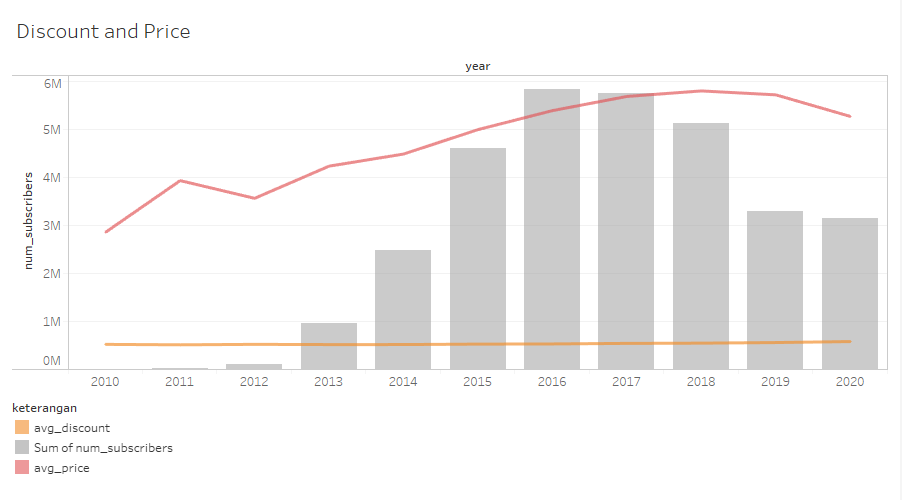

hal tersebut diperkuat dengan hasil visualisasi perbandingan harga asli dengan harga yang telah didiskon terhadap jumlah pelanggan. ternyata dengan harga diskon yang kurang lebih harganya konstan dari tahun ke tahun tidak memberikan pengaruh pada jumlah pelanggan

## price pada num_lectures

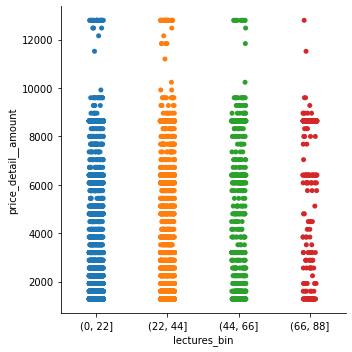

In [ ]:
sns.catplot(x='lectures_bin', y='price_detail__amount', data=price_course_2)

dari hasil diatas dapat diperoleh kesimpulan bahwa ternyata penentuan harga tidak memiliki pengaruh dengan harga yang ditetapkan. masing-masing jumlah memiliki penyebaran harga yang rata tersebar di masing masing harga. dan bukan juga dipengaruhi kepopuleran (banyaknya pelanggan) entah karena murah atau mahal karena berkualitas, yang jelas harga juga tidak mempengaruhi jumlah pelanggan. Jadi bisa ditarik hipotesis bahwa pemberlakuan harga bisa diliat dari tingkat kesulitan topik yang dibahas untuk saat ini.

## Price pada rating

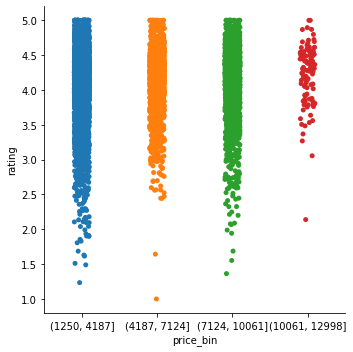

In [ ]:
sns.catplot(x='price_bin', y='rating', data=price_rating)
#g.fig.set_size_inches(3,6)

1250 4187
4187 7124
7124 10061
10061 12998

dari hasil visualisasi diatas dapat ditarik kesimpulan smeentara bahwa harga course tidak memiliki pengaruh terhadap rating. yang awalnya kami menyimpulkan bahwa harga course bisa diliat dari kualitas course dengan melihat rating masing-masing course. ternyata masing masing harga merata ratingnya.

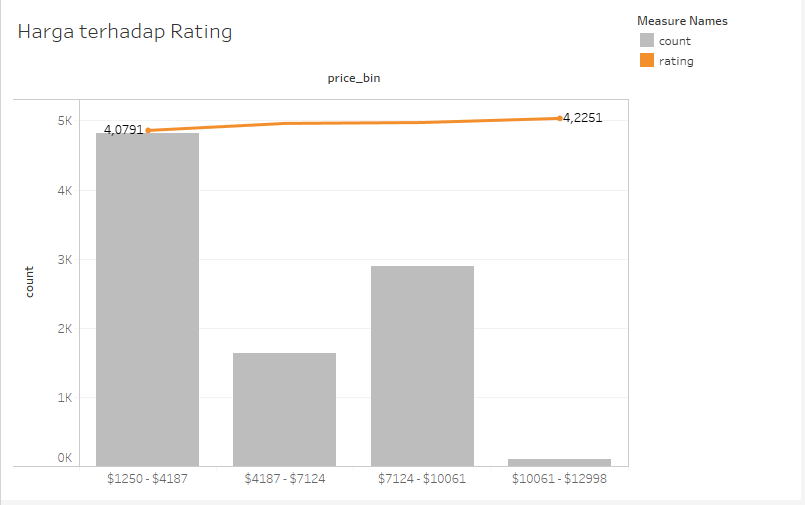

namun, visualisasi ini mencoba lebih memperjelas. ternyata walaupun rating hampir sama, rating tertinggi tetap diperoleh dari course dengan harga yang tinggi. yang bisa disimpulkan course tersebut berkualitas, bermanfaat dan sesuai kebutuhan pelanggan. walaupun jumlah course harga ini terhitung sedikit.
tetapi secara keseluruhan course udemy memiliki rating yang cukup baik

## Rating pada Subscribe

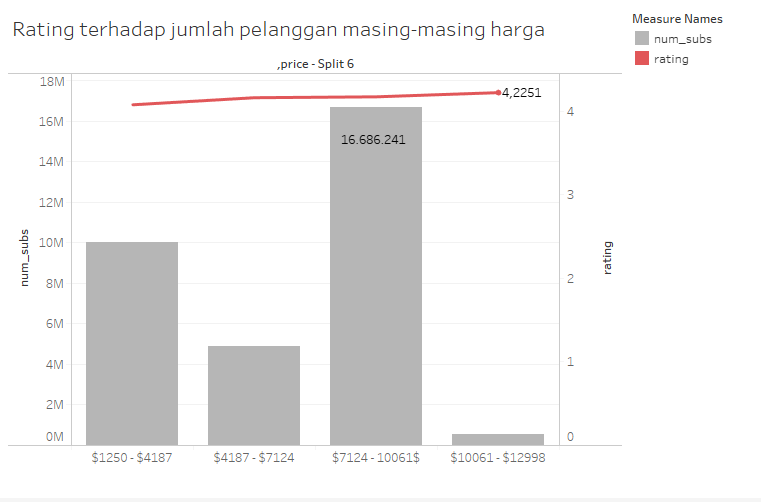

ternyata, rating juga mempengaruhi jumlah pelanggan. bisa dikatakan rating terbanyak mempengaruhi jumlah pelanggan. pelanggan juga memperhatikan harga. pelanggan lebih memilih berlangganan pada harga course tingkat ke-3. yang bisa dikatakan rate harga ketiga hampir sama dengan harga keempat. perusahaan bisa lebih memperbanyak jumlah course pada jenis harga ketiga